<a href="https://colab.research.google.com/github/naga-dheeraj-p/Assignments/blob/main/1Final_Crypto_Momentum_Prediction_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
tweets.tail()

NameError: name 'tweets' is not defined

# Sentiment Analysis

In [ ]:
!pip install pandas nltk vaderSentiment


In [ ]:
import pandas as pd
from datetime import datetime

tweets_data = pd.read_csv('/content/gdrive/MyDrive/Bitcoin_tweets.csv.zip')

tweets = tweets_data[['user_followers', 'user_friends', 'date', 'text', 'hashtags']]
def round_to_nearest_hour(dt_str):
    try:
        dt = datetime.strptime(dt_str, '%Y-%m-%d %H:%M:%S')
        if dt.minute >= 30:
            dt = dt + pd.Timedelta(hours=1)
        return dt.replace(minute=0, second=0, microsecond=0)
    except ValueError:
        return dt_str  # Return the original value if it cannot be parsed
tweets['date'] = tweets['date'].apply(lambda x: round_to_nearest_hour(str(x)))
tweets.head()


In [11]:
import re

def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove special characters and numbers
    text = re.sub(r'[^A-Za-z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    return text

tweets['cleaned_text'] = tweets['text'].apply(preprocess_text)
tweets.head()

TypeError: expected string or bytes-like object

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment_scores(text):
    return analyzer.polarity_scores(text)

# Apply the sentiment analysis
tweets['sentiment_scores'] = tweets['cleaned_text'].apply(get_sentiment_scores)

# Extract compound score to determine overall sentiment
tweets['compound_score'] = tweets['sentiment_scores'].apply(lambda x: x['compound'])

# Determine sentiment label
def get_sentiment_label(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

tweets['sentiment'] = tweets['compound_score'].apply(get_sentiment_label)
tweets.head()


In [ ]:
# Summary of sentiment counts
sentiment_counts = tweets['sentiment'].value_counts()

print("Sentiment Analysis Summary:")
print(sentiment_counts)

# Display the first few rows with sentiment
tweets[['text', 'sentiment']].head()


# New section

In [ ]:
data=pd.read_csv('/content/gdrive/MyDrive/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv.zip')
data['Timestamp'] = pd.to_datetime(data.iloc[:, 0], unit='s')
data.tail()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
4857372,2021-03-30 23:56:00,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,2021-03-30 23:57:00,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,2021-03-30 23:58:00,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,2021-03-30 23:59:00,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202
4857376,2021-03-31 00:00:00,58767.75,58778.18,58755.97,58778.18,2.712831,159417.751000,58764.349363


In [ ]:
data.drop(columns=['Volume_(Currency)','Weighted_Price'],inplace=True)
data['returns'] = ((data['Close'] / data['Open']) - 1) * 100 #calculating returns for each hour
data.set_index('Timestamp', inplace=True)
data.tail()

,Open,High,Low,Close,Volume_(BTC),returns
Timestamp,,,,,,
2021-03-30 23:56:00,58714.31,58714.31,58686.00,58686.00,1.384487,-0.048217
2021-03-30 23:57:00,58683.97,58693.43,58683.97,58685.81,7.294848,0.003135
2021-03-30 23:58:00,58693.43,58723.84,58693.43,58723.84,1.705682,0.051812
2021-03-30 23:59:00,58742.18,58770.38,58742.18,58760.59,0.720415,0.031340
2021-03-31 00:00:00,58767.75,58778.18,58755.97,58778.18,2.712831,0.017748


In [ ]:
hourly_data = data.resample('H').agg({'Open': 'first','High': 'max','Low': 'min','Close': 'last','Volume_(BTC)': 'sum','returns': 'mean'})  # Assuming 'returns' is a column representing minute-level returns
daily_data=hourly_data.resample('D').agg({'Open': 'first', 'High': 'max', 'Low': 'min', 'Close': 'last', 'Volume_(BTC)': 'sum', 'returns': 'mean'})
hourly_data.reset_index(inplace=True)
hourly_data.tail()

,Timestamp,Open,High,Low,Close,Volume_(BTC),returns
81061,2021-03-30 20:00:00,59118.91,59135.00,58402.82,58669.04,118.576288,-0.013386
81062,2021-03-30 21:00:00,58644.04,58872.27,58570.57,58759.04,57.605048,0.008879
81063,2021-03-30 22:00:00,58758.44,58941.34,58642.58,58711.15,68.019168,-0.000902
81064,2021-03-30 23:00:00,58699.43,58770.38,58567.11,58760.59,78.329260,0.001545
81065,2021-03-31 00:00:00,58767.75,58778.18,58755.97,58778.18,2.712831,0.017748


In [ ]:
rolling_returns = hourly_data['returns'].rolling(window=30).mean() #calculating mean
std_dev = hourly_data['returns'].rolling(window=30).std() #calculating std deviation

daily_rolling_returns=daily_data['returns'].rolling(window=30).mean()
daily_std_dev = daily_data['returns'].rolling(window=30).std()

In [ ]:
k=2 # Selected this due to lesser number of false signals
hourly_data['overreaction'] = np.where(hourly_data['returns'] > rolling_returns + k * std_dev, 1,
                                    np.where(hourly_data['returns'] < rolling_returns - k * std_dev, -1, 0))

daily_data['overreaction'] = np.where(daily_data['returns'] > daily_rolling_returns + k * daily_std_dev, 1,
                                    np.where(daily_data['returns'] < daily_rolling_returns - k * daily_std_dev, -1, 0))

In [ ]:
hourly_data.head()
daily_data.head()

,Open,High,Low,Close,Volume_(BTC),returns,overreaction
Timestamp,,,,,,,
2011-12-31,4.39,4.58,4.39,4.58,95.317878,0.388889,0
2012-01-01,4.58,5.00,4.58,5.00,21.602000,0.000000,0
2012-01-02,5.00,5.00,5.00,5.00,19.048000,0.000000,0
2012-01-03,5.32,5.32,5.14,5.29,88.037281,0.000000,0
2012-01-04,4.93,5.57,4.93,5.57,107.233260,0.651827,0


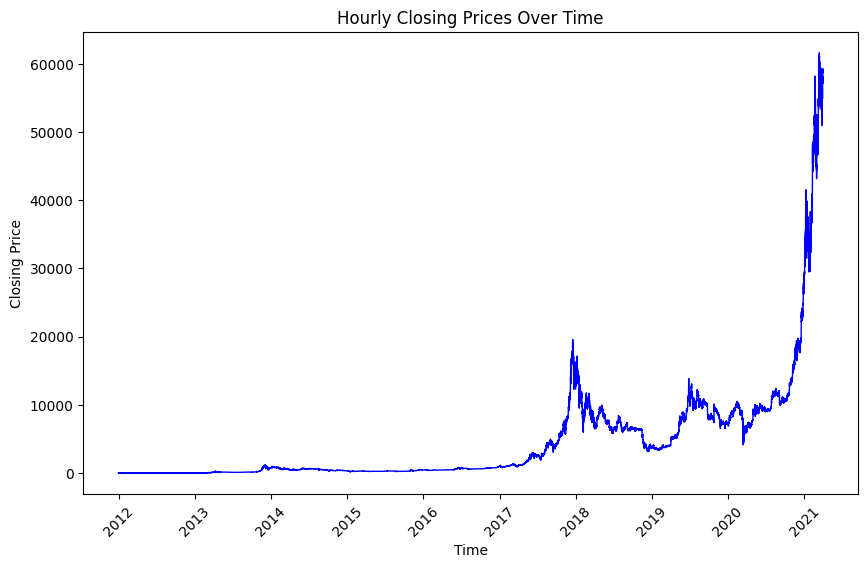

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(hourly_data['Timestamp'], hourly_data['Close'], color='blue', linewidth=1) # Plot the closing prices
plt.title('Hourly Closing Prices Over Time')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)  # Rotating x-axis labels
plt.show()

In [ ]:
pip install imbalanced-learn

In [ ]:
value_counts = hourly_data['overreaction'].value_counts()
print(value_counts)
daily_value_counts=daily_data['overreaction'].value_counts()
print(daily_value_counts)

overreaction
 0    77327
-1     1995
 1     1744
Name: count, dtype: int64
overreaction
 0    3182
-1     107
 1      90
Name: count, dtype: int64


In [ ]:
hourly_data['Timestamp'] = pd.to_datetime(hourly_data['Timestamp'])
hourly_data_2016_onwards = hourly_data[hourly_data['Timestamp'].dt.year >= 2016]
hourly_data_2016_onwards.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),returns,overreaction
35081,2016-01-01 00:00:00,430.89,432.58,429.82,431.02,41.320972,-0.024261,0
35082,2016-01-01 01:00:00,431.51,432.01,429.08,430.01,31.212239,-0.001497,0
35083,2016-01-01 02:00:00,430.00,431.69,430.00,430.57,12.246236,-0.001942,0
35084,2016-01-01 03:00:00,430.50,433.37,430.03,433.37,74.984254,0.024811,0
35085,2016-01-01 04:00:00,433.34,435.72,432.55,435.11,870.803435,-0.006614,0


In [ ]:
pip install ta

In [ ]:
from ta import add_all_ta_features
hourly_data_2016_onwards = hourly_data_2016_onwards.copy()

# Calculating MovingAvg, RSI, MACD, etc.
training_data = add_all_ta_features(hourly_data_2016_onwards, open='Open', high='High', low='Low', close='Close', volume='Volume_(BTC)', fillna=True)

training_data = training_data[['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume_(BTC)', 'returns','trend_macd', 'trend_macd_signal', 'trend_macd_diff', 'trend_sma_fast',
       'trend_sma_slow', 'trend_ema_fast', 'trend_ema_slow','overreaction']]
training_data.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),returns,trend_macd,trend_macd_signal,trend_macd_diff,trend_sma_fast,trend_sma_slow,trend_ema_fast,trend_ema_slow,overreaction
35081,2016-01-01 00:00:00,430.89,432.58,429.82,431.02,41.320972,-0.024261,0.000000,0.000000,0.000000,431.020000,431.020000,431.020000,431.020000,0
35082,2016-01-01 01:00:00,431.51,432.01,429.08,430.01,31.212239,-0.001497,-0.080570,-0.016114,-0.064456,430.515000,430.515000,430.864615,430.945185,0
35083,2016-01-01 02:00:00,430.00,431.69,430.00,430.57,12.246236,-0.001942,-0.098104,-0.032512,-0.065592,430.533333,430.533333,430.819290,430.917394,0
35084,2016-01-01 03:00:00,430.50,433.37,430.03,433.37,74.984254,0.024811,0.112639,-0.003482,0.116120,431.242500,431.242500,431.211707,431.099068,0
35085,2016-01-01 04:00:00,433.34,435.72,432.55,435.11,870.803435,-0.006614,0.415270,0.080269,0.335001,432.016000,432.016000,431.811444,431.396174,0


In [ ]:
nan_values_columnwise = training_data.isna().sum()
nan_values_columnwise

Timestamp            0
Open                 4
High                 4
Low                  4
Close                4
Volume_(BTC)         0
returns              4
trend_macd           0
trend_macd_signal    0
trend_macd_diff      0
trend_sma_fast       0
trend_sma_slow       0
trend_ema_fast       0
trend_ema_slow       0
overreaction         0
dtype: int64

In [ ]:
training_data['overreaction'] = training_data['overreaction'].astype(float)

columns = list(training_data.columns)
columns.remove('overreaction')
columns.append('overreaction')

training_data = training_data.reindex(columns=columns)
training_data.head()
#print(training_data.shape)

<ipython-input-193-4ff06515aa87>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data['overreaction'] = training_data['overreaction'].astype(float)


,Timestamp,Open,High,Low,Close,Volume_(BTC),returns,trend_macd,trend_macd_signal,trend_macd_diff,trend_sma_fast,trend_sma_slow,trend_ema_fast,trend_ema_slow,overreaction
35081,2016-01-01 00:00:00,430.89,432.58,429.82,431.02,41.320972,-0.024261,0.000000,0.000000,0.000000,431.020000,431.020000,431.020000,431.020000,0.0
35082,2016-01-01 01:00:00,431.51,432.01,429.08,430.01,31.212239,-0.001497,-0.080570,-0.016114,-0.064456,430.515000,430.515000,430.864615,430.945185,0.0
35083,2016-01-01 02:00:00,430.00,431.69,430.00,430.57,12.246236,-0.001942,-0.098104,-0.032512,-0.065592,430.533333,430.533333,430.819290,430.917394,0.0
35084,2016-01-01 03:00:00,430.50,433.37,430.03,433.37,74.984254,0.024811,0.112639,-0.003482,0.116120,431.242500,431.242500,431.211707,431.099068,0.0
35085,2016-01-01 04:00:00,433.34,435.72,432.55,435.11,870.803435,-0.006614,0.415270,0.080269,0.335001,432.016000,432.016000,431.811444,431.396174,0.0


OUTLIER REMOVAL

In [ ]:
#print(training_data.count())
print('')
columns_to_handle_outliers=['Open','High',	'Low',	'Close',	'Volume_(BTC)',	'returns']
for i in columns_to_handle_outliers:
    Q1 =  training_data[i].quantile(0.25)
    Q3 =  training_data[i].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = (training_data[i] < lower_bound) | (training_data[i] > upper_bound)
    training_data.loc[outliers, i] = None

processed_data= training_data.dropna()
#print(processed_data.count())
processed_data.head()
processed_data.tail()

,Timestamp,Open,High,Low,Close,Volume_(BTC),returns,trend_macd,trend_macd_signal,trend_macd_diff,trend_sma_fast,trend_sma_slow,trend_ema_fast,trend_ema_slow,overreaction
78566,2020-12-16 21:00:00,20830.11,21320.61,20740.55,21215.49,844.146644,0.029919,412.926249,312.066449,100.859799,20503.992500,19927.133462,20539.161271,20126.235023,1.0
78567,2020-12-16 22:00:00,21206.50,21464.97,21203.77,21393.45,667.725259,-0.001532,450.487508,339.750661,110.736847,20636.969167,20000.024615,20670.590307,20220.102799,0.0
78568,2020-12-16 23:00:00,21393.55,21576.76,21218.58,21365.70,639.172448,-0.017849,472.568409,366.314211,106.254198,20771.340000,20074.542692,20777.530259,20304.961851,0.0
78569,2020-12-17 00:00:00,21358.96,21423.13,21244.04,21423.13,409.553895,0.007135,489.064175,390.864203,98.199972,20908.550000,20149.793846,20876.853296,20387.789121,0.0
78570,2020-12-17 01:00:00,21416.95,21880.00,21416.95,21738.47,680.886171,0.014474,521.570156,417.005394,104.564762,21024.955833,20238.393846,21009.409712,20487.839557,0.0


KNN

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

# Slicing
x = processed_data.iloc[:, 1:-1].values
y = processed_data.iloc[:, -1].values

# Removing the missing values
clean_indices = ~np.isnan(x).any(axis=1)
x_cleaned = x[clean_indices]
y_cleaned = y[clean_indices]

# StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_cleaned)

# Performing Principal component analysis

pca = PCA(0.85)
x_pca = pca.fit_transform(x_scaled)
x_train, x_test, y_train, y_test = train_test_split(x_pca, y_cleaned, test_size=0.3, random_state=40, stratify=y_cleaned)

# KNN MODEL
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto')
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
#print(np.unique(y_cleaned))
print("Accuracy:", round(accuracy * 100, 2), "%")

Accuracy: 97.5 %


In [ ]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score (Weighted):", round(f1,3))

F1 Score (Weighted): 0.966


# Testing Data

In [ ]:
'''!pip install ccxt'''

'!pip install ccxt'

In [ ]:
'''pip install python-binance'''

'pip install python-binance'

In [ ]:
testing_data=pd.read_csv('/content/gdrive/MyDrive/testingdata_BTC.zip')
testing_data['Date'] = pd.to_datetime(testing_data['Date'], errors='coerce') # Handling errors in datetime

filtered_data = testing_data[(testing_data['Date'].dt.year == 2022) | (testing_data['Date'].dt.year == 2023)].copy()

filtered_data.drop(columns=['Symbol','tradecount','Volume USDT'], inplace=True)
filtered_data['returns'] = ((filtered_data['Close'] / filtered_data['Open']) - 1) * 100
reversed_data = filtered_data.iloc[::-1]


reversed_data.head()
reversed_data.tail()

,Date,Open,High,Low,Close,Volume BTC,returns
4,2023-10-19 19:00:00,28646.98,28765.76,28645.00,28750.75,1039.20935,0.362237
3,2023-10-19 20:00:00,28750.75,28882.07,28684.80,28715.38,1737.14711,-0.123023
2,2023-10-19 21:00:00,28715.39,28739.73,28604.09,28604.09,1118.51697,-0.387597
1,2023-10-19 22:00:00,28604.09,28704.99,28598.60,28649.65,767.85518,0.159278
0,2023-10-19 23:00:00,28649.64,28717.82,28630.19,28713.71,613.28448,0.223633


In [ ]:
# Preprocess the new data
reversed_data_copy = reversed_data.copy()

training_data = add_all_ta_features(reversed_data_copy, open='Open', high='High', low='Low', close='Close', volume='Volume BTC', fillna=True)

training_data = training_data.loc[:, ['Date', 'Open', 'High', 'Low', 'Close', 'Volume BTC', 'returns','trend_macd', 'trend_macd_signal', 'trend_macd_diff', 'trend_sma_fast',
       'trend_sma_slow', 'trend_ema_fast', 'trend_ema_slow']]

new_x = training_data.loc[:, ['Open', 'High', 'Low', 'Close', 'Volume BTC', 'returns', 'trend_macd', 'trend_macd_signal', 'trend_macd_diff', 'trend_sma_fast', 'trend_sma_slow', 'trend_ema_fast', 'trend_ema_slow']].values


clean_indices_new = ~np.isnan(new_x).any(axis=1)
new_x_cleaned = new_x[clean_indices_new]

new_x_scaled = scaler.transform(new_x_cleaned)
new_x_pca = pca.transform(new_x_scaled)
new_y_pred = knn.predict(new_x_pca)

print("Predicted overrelation for new data:", new_y_pred)


Predicted overrelation for new data: [0. 0. 0. ... 0. 0. 0.]


In [ ]:
unique_values, counts = np.unique(new_y_pred, return_counts=True)
print(dict(zip(unique_values, counts)))

{-1.0: 33, 0.0: 15690, 1.0: 43}


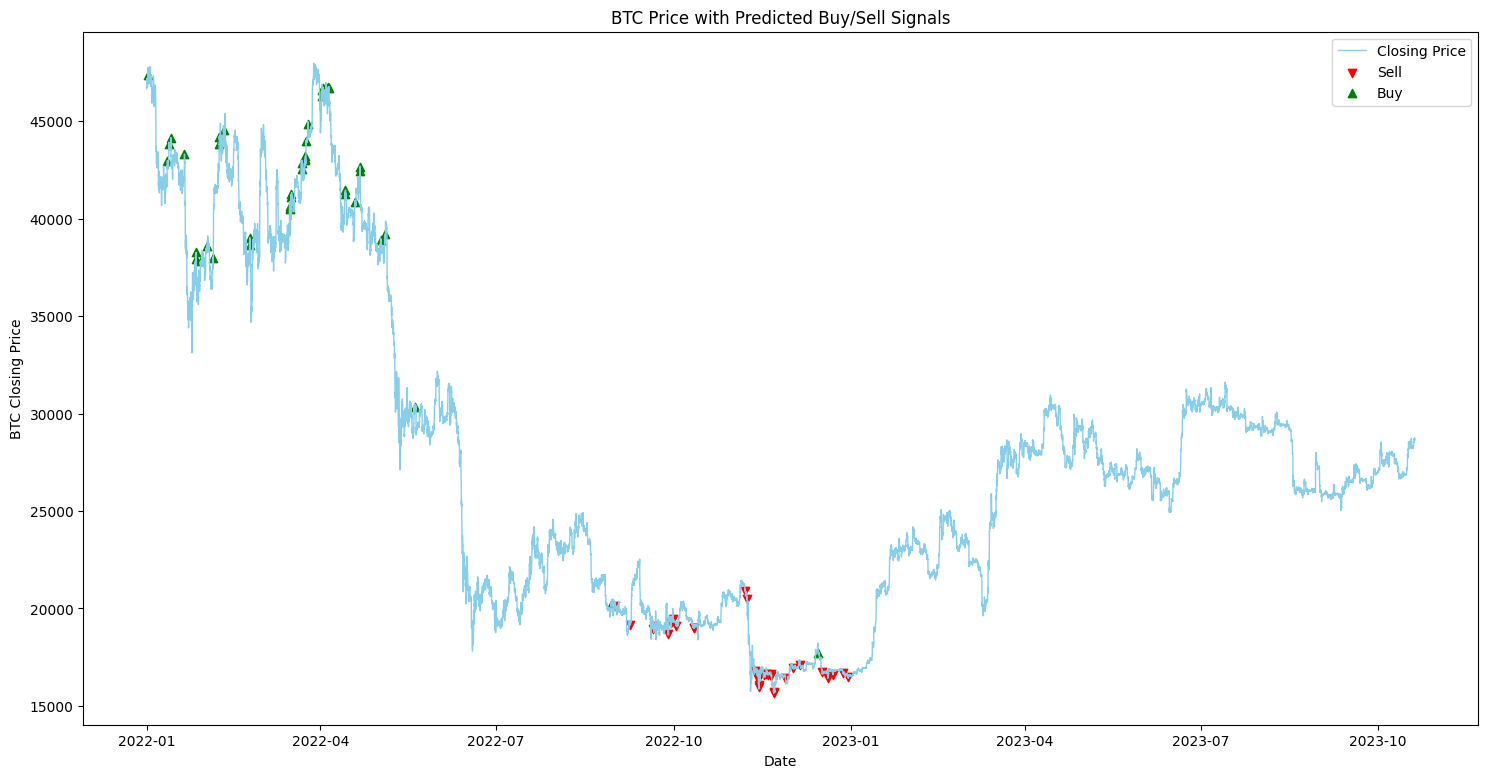

In [ ]:
import matplotlib.pyplot as plt

timestamps=reversed_data['Date']
closing_prices=reversed_data['Close']

predicted_df = pd.DataFrame({'Timestamp': timestamps, 'Close': closing_prices})

predicted_df['Predicted Overreaction'] = new_y_pred

plt.figure(figsize=(18, 9))
plt.plot(predicted_df['Timestamp'], predicted_df['Close'], color='skyblue', label='Closing Price',linewidth=1)

# Plot the predicted overreaction values with different markers or colors
sell_points = predicted_df[predicted_df['Predicted Overreaction'] == -1.0]
buy_points = predicted_df[predicted_df['Predicted Overreaction'] == 1.0]
plt.scatter(sell_points['Timestamp'], sell_points['Close'], color='red', label='Sell', marker='v')
plt.scatter(buy_points['Timestamp'], buy_points['Close'], color='green', label='Buy', marker='^')

plt.xlabel('Date')
plt.ylabel('BTC Closing Price')
plt.title('BTC Price with Predicted Buy/Sell Signals')
plt.legend()
plt.show()

CALCULATING PROFIT PERCENTAGE

In [ ]:
import pandas as pd


reversed_data = reversed_data.copy()  # Making a copy of the DataFrame
reversed_data['Predicted Overreaction'] = new_y_pred

grouped_data = reversed_data.groupby(reversed_data['Date'].dt.date) # Grouping date to calculate the returns for the entire day

total_returns = {}

for date, group in grouped_data:
    day_data = group[group['Date'].dt.date == date]
    buy_signals = (day_data['Predicted Overreaction'] == 1.0)
    sell_signals = (day_data['Predicted Overreaction'] == -1.0)

    buy_returns = day_data.loc[buy_signals, 'returns']
    sell_returns = day_data.loc[sell_signals, 'returns']

    buy_profit_loss = (buy_returns / 100)  # Converting percentage to decimal
    sell_profit_loss = -(sell_returns / 100)

    total_return = buy_profit_loss.sum() + sell_profit_loss.sum()
    total_returns[date] = total_return

total_returns_df = pd.DataFrame.from_dict(total_returns, orient='index', columns=['Total Return'])
non_zero_returns_df = total_returns_df[total_returns_df['Total Return'] != 0]

non_zero_returns_df.head()

,Total Return
2022-01-01,0.001311
2022-01-11,0.005077
2022-01-12,0.005286
2022-01-13,0.005234
2022-01-20,0.007890


In [ ]:
initial_investment = 10000

non_zero_returns_df = non_zero_returns_df.copy()  # Make a copy of the DataFrame
non_zero_returns_df['Final Value if invested'] = initial_investment * (1 + non_zero_returns_df['Total Return'])
non_zero_returns_df.head()

,Total Return,Final Value if invested
2022-01-01,0.001311,10013.105911
2022-01-11,0.005077,10050.768343
2022-01-12,0.005286,10052.862773
2022-01-13,0.005234,10052.341956
2022-01-20,0.007890,10078.897511


In [ ]:
total_return_sum = non_zero_returns_df['Total Return'].sum()

total_returns = total_return_sum * initial_investment
print("Total Returns:", round(total_returns,2),'$')

ROI_percentage = (total_returns / initial_investment) * 100
print("ROI (Return on Investment) percentage:", round(ROI_percentage,2), "%")

Total Returns: 4674.72 $
ROI (Return on Investment) percentage: 46.75 %
